In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-shopping/AI in Retail Dataset.csv


In [2]:
%pwd

'/kaggle/working'

In [3]:
# import the dataset
#filepath = "/kaggle/input/online-shopping/AI in Retail Dataset.csv"
df = pd.read_csv("/kaggle/input/online-shopping/AI in Retail Dataset.csv", encoding="latin1")
df.head()

,Country,Online_Consumer,Age,Annual_Salary,Gender,Education,Payment_Method_Credit/Debit,Living_Region,Online_Service_Preference,AI_Endorsement,...,AI_Tools_Used _Chatbots,AI_Tools_Used_Virtual_Assistant,AI_Tools_Used_Voice&Photo_Search,Payment_Method_COD,Payment_Method_Ewallet,Product_Category_Appliances,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing
0,INDIA,YES,Gen X,Medium High,Female,Masters Degree,NO,Metropolitan,NO,YES,...,YES,YES,YES,YES,NO,YES,YES,YES,YES,YES
1,INDIA,YES,Gen Z,Low,Male,University Graduate,YES,Metropolitan,NO,YES,...,YES,YES,YES,YES,YES,YES,YES,NO,NO,NO
2,INDIA,YES,Gen X,Medium High,Male,University Graduate,YES,Rural Areas,YES,YES,...,NO,YES,NO,YES,YES,YES,YES,YES,NO,NO
3,INDIA,YES,Gen X,High,Male,University Graduate,YES,Rural Areas,YES,YES,...,NO,NO,NO,YES,YES,YES,YES,YES,NO,YES
4,INDIA,YES,Gen Z,Low,Male,University Graduate,NO,Rural Areas,YES,YES,...,YES,NO,NO,YES,YES,YES,NO,YES,NO,YES


In [4]:
# time for some exploratory analysis
df.columns

Index(['Country', 'Online_Consumer', 'Age', 'Annual_Salary', 'Gender',
       'Education', 'Payment_Method_Credit/Debit', 'Living_Region',
       'Online_Service_Preference', 'AI_Endorsement', 'AI_Privacy_No_Trust ',
       'AI_Enhance_Experience', 'AI_Satisfication', 'AI_Tools_Used _Chatbots',
       'AI_Tools_Used_Virtual_Assistant', 'AI_Tools_Used_Voice&Photo_Search',
       'Payment_Method_COD', 'Payment_Method_Ewallet',
       'Product_Category_Appliances', 'Product_Category_Electronics',
       'Product_Category_Groceries', 'Product_Category_Personal_Care',
       'Product_Category_Clothing'],
      dtype='object')

In [5]:
df.size

15088

In [6]:
df["Country"].unique()

array(['INDIA', 'CHINA', 'CANADA'], dtype=object)

In [7]:
df.dtypes

Country                             object
Online_Consumer                     object
Age                                 object
Annual_Salary                       object
Gender                              object
Education                           object
Payment_Method_Credit/Debit         object
Living_Region                       object
Online_Service_Preference           object
AI_Endorsement                      object
AI_Privacy_No_Trust                 object
AI_Enhance_Experience               object
AI_Satisfication                    object
AI_Tools_Used _Chatbots             object
AI_Tools_Used_Virtual_Assistant     object
AI_Tools_Used_Voice&Photo_Search    object
Payment_Method_COD                  object
Payment_Method_Ewallet              object
Product_Category_Appliances         object
Product_Category_Electronics        object
Product_Category_Groceries          object
Product_Category_Personal_Care      object
Product_Category_Clothing           object
dtype: obje

In [8]:
df_Canada = df[df["Country"] == "CANADA"]
df_Canada.head()

,Country,Online_Consumer,Age,Annual_Salary,Gender,Education,Payment_Method_Credit/Debit,Living_Region,Online_Service_Preference,AI_Endorsement,...,AI_Tools_Used _Chatbots,AI_Tools_Used_Virtual_Assistant,AI_Tools_Used_Voice&Photo_Search,Payment_Method_COD,Payment_Method_Ewallet,Product_Category_Appliances,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing
425,CANADA,YES,Millennials,High,Male,University Graduate,YES,Metropolitan,YES,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
426,CANADA,YES,Millennials,Medium,Male,Highschool Graduate,YES,Rural Areas,NO,YES,...,YES,NO,NO,YES,YES,NO,YES,NO,NO,NO
427,CANADA,YES,Millennials,Medium High,Male,University Graduate,YES,Metropolitan,NO,YES,...,YES,NO,NO,NO,NO,NO,YES,NO,YES,YES
428,CANADA,YES,Millennials,Medium,Male,University Graduate,YES,Metropolitan,NO,YES,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
429,CANADA,YES,Gen X,High,Female,Highschool Graduate,NO,Suburban Areas,YES,NO,...,YES,YES,NO,NO,YES,YES,YES,YES,YES,YES


In [9]:
# now list the count of all distinct values in the
for column in df.columns:
    value_count = df[column].nunique()
    print(column, ": ", value_count)
    

Country :  3
Online_Consumer :  2
Age :  4
Annual_Salary :  4
Gender :  3
Education :  4
Payment_Method_Credit/Debit :  2
Living_Region :  3
Online_Service_Preference :  2
AI_Endorsement :  2
AI_Privacy_No_Trust  :  2
AI_Enhance_Experience :  2
AI_Satisfication :  2
AI_Tools_Used _Chatbots :  2
AI_Tools_Used_Virtual_Assistant :  2
AI_Tools_Used_Voice&Photo_Search :  2
Payment_Method_COD :  2
Payment_Method_Ewallet :  2
Product_Category_Appliances :  2
Product_Category_Electronics :  2
Product_Category_Groceries :  2
Product_Category_Personal_Care :  2
Product_Category_Clothing :  2


In [10]:
# check for missing values
# num rows with missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Country                           656 non-null    object
 1   Online_Consumer                   656 non-null    object
 2   Age                               656 non-null    object
 3   Annual_Salary                     656 non-null    object
 4   Gender                            656 non-null    object
 5   Education                         656 non-null    object
 6   Payment_Method_Credit/Debit       656 non-null    object
 7   Living_Region                     656 non-null    object
 8   Online_Service_Preference         656 non-null    object
 9   AI_Endorsement                    656 non-null    object
 10  AI_Privacy_No_Trust               656 non-null    object
 11  AI_Enhance_Experience             656 non-null    object
 12  AI_Satisfication      

Looks like there are no null values

In [11]:
df.shape

(656, 23)

## Some questions to consider:
- What is the distribution of data by country?
- What is the distribution of AI endorsement and satisfaction by Age, Income, Education,
- Is there any difference in AI satisfaction and endorsement by the tools being used?
- Satisfaction with AI based on shopping category preferences

In [12]:
# import visualization tools
import matplotlib.pyplot as plt

In [13]:
# checking data distribution by country
df_country = df['Country'].value_counts().reset_index()
df_country.columns = ["Country", "Count"]
df_country

,Country,Count
0,CHINA,252
1,CANADA,231
2,INDIA,173


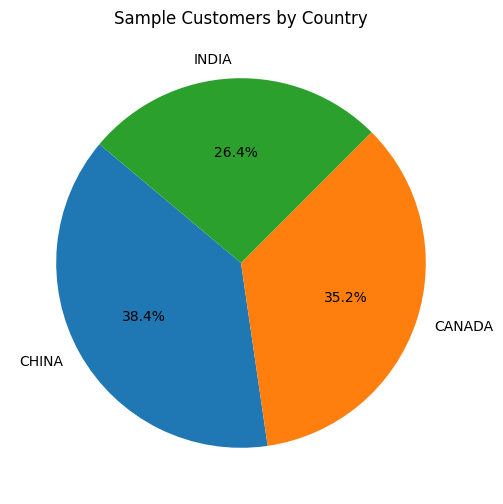

In [14]:
plt.figure(figsize=(6,6))
plt.pie(df_country["Count"], labels=df_country["Country"], autopct="%1.1f%%", startangle=140)

plt.title("Sample Customers by Country")
plt.show()

Okay, the data is evenly distributed between Canada, China and India (as expected)

In [15]:
# now check the distribution by country and type of area lived by the customers
df_country_living_region = df.groupby(['Country', 'Living_Region']).size().unstack().fillna(0).astype(int)
df_country_living_region

Living_Region,Metropolitan,Rural Areas,Suburban Areas
Country,,,
CANADA,102,32,97
CHINA,191,13,48
INDIA,145,28,0


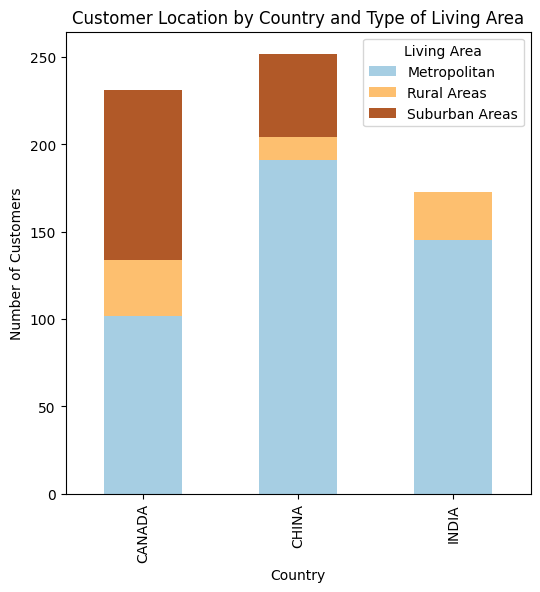

In [16]:
# visualiazing the local demographics
df_country_living_region.plot(kind="bar", stacked=True, figsize=(6,6), colormap="Paired")
plt.xlabel("Country")
plt.ylabel("Number of Customers")
plt.title("Customer Location by Country and Type of Living Area")
plt.legend(title="Living Area")
plt.show()

Looks  like most of the sample customers live in Metropolitan areas.

In [34]:
# let's see what kind of people are satisfied and endorses the use of AI in customer service
df_demograophics = df[['Online_Consumer', 'Age', 'Annual_Salary','Gender','Education','AI_Endorsement','AI_Satisfication']]
df_demograophics.head()

,Online_Consumer,Age,Annual_Salary,Gender,Education,AI_Endorsement,AI_Satisfication
0,YES,Gen X,Medium High,Female,Masters Degree,YES,Satisfied
1,YES,Gen Z,Low,Male,University Graduate,YES,Satisfied
2,YES,Gen X,Medium High,Male,University Graduate,YES,Satisfied
3,YES,Gen X,High,Male,University Graduate,YES,Satisfied
4,YES,Gen Z,Low,Male,University Graduate,YES,Satisfied


## Observing AI endorsement and satisfaction by demographic labels

- By Education

<ipython-input-49-572bbfce9b3a>:17: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


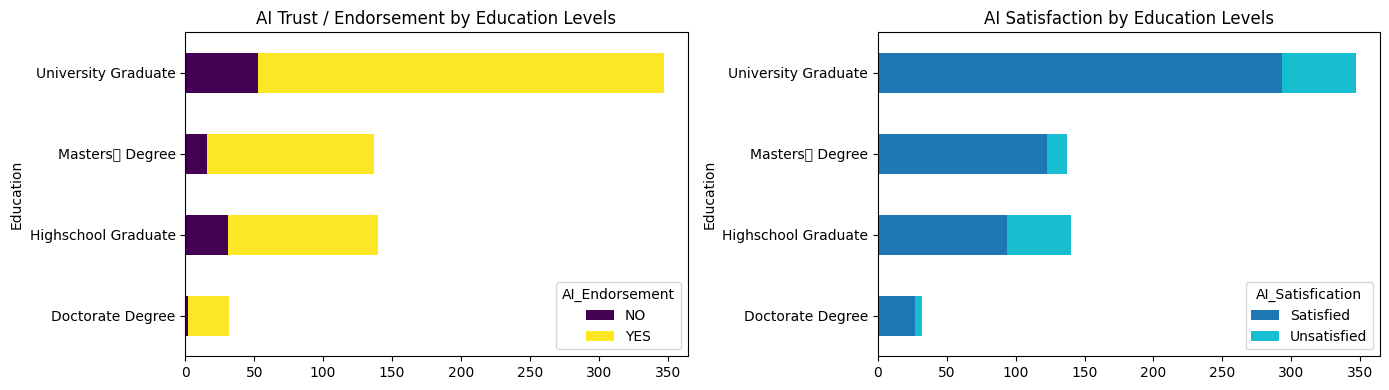

In [49]:
df_demograophics_education = df[['Education','AI_Endorsement','AI_Satisfication']]
df_demograophics_education_endorsement = df_demograophics_education.groupby(['Education', 'AI_Endorsement']).size().unstack().fillna(0).astype(int)

df_demograophics_education_satisfaction = df_demograophics_education.groupby(['Education', 'AI_Satisfication']).size().unstack().fillna(0).astype(int)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,4))



df_demograophics_education_endorsement.plot(kind="barh", stacked=True, ax=axes[0], colormap="viridis")
axes[0].set_title("AI Trust / Endorsement by Education Levels")


df_demograophics_education_satisfaction.plot(kind="barh", stacked=True, ax=axes[1], colormap="tab10")
axes[1].set_title("AI Satisfaction by Education Levels")

plt.tight_layout()
plt.show()


- By Income

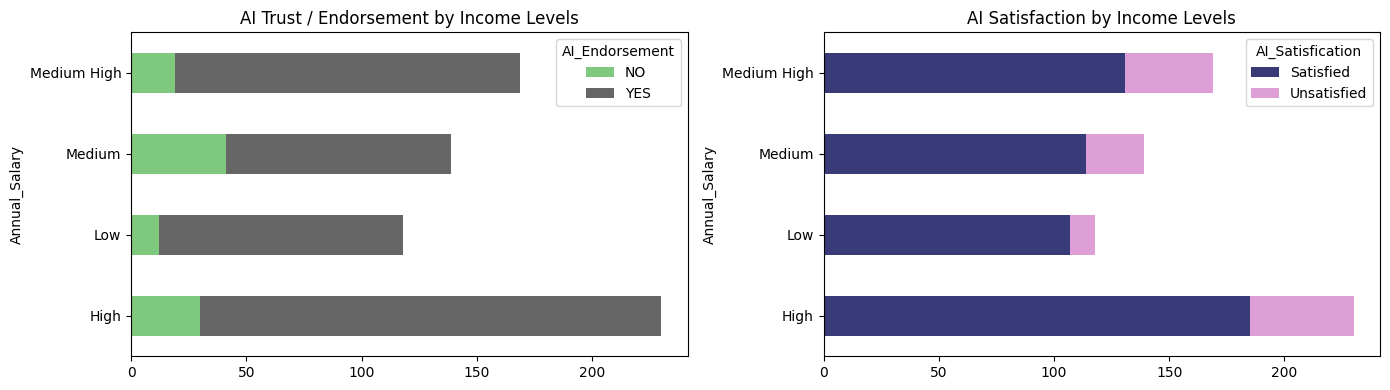

In [50]:
# let's check by income levels
df_demograophics_income = df[['Annual_Salary','AI_Endorsement','AI_Satisfication']]
df_demograophics_income_endorsement = df_demograophics_income.groupby(['Annual_Salary', 'AI_Endorsement']).size().unstack().fillna(0).astype(int)

df_demograophics_income_satisfaction = df_demograophics_income.groupby(['Annual_Salary', 'AI_Satisfication']).size().unstack().fillna(0).astype(int)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,4))

df_demograophics_income_endorsement.plot(kind="barh", stacked=True, ax=axes[0], colormap="Accent")
axes[0].set_title("AI Trust / Endorsement by Income Levels")


df_demograophics_income_satisfaction.plot(kind="barh", stacked=True, ax=axes[1], colormap="tab20b")
axes[1].set_title("AI Satisfaction by Income Levels")


plt.tight_layout()
plt.show()

- By Age Bracket

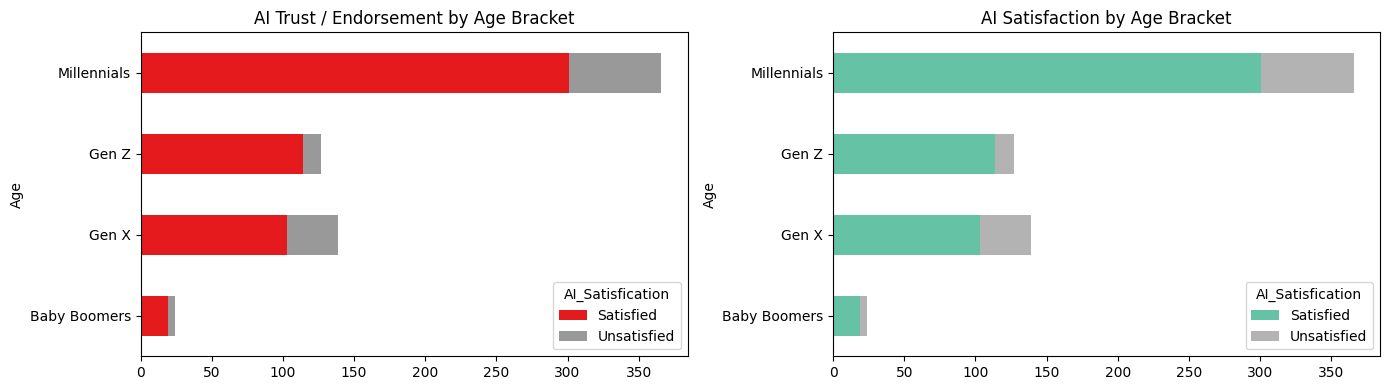

In [106]:
df_demograophics_age = df[['Age','AI_Endorsement','AI_Satisfication']]
df_demograophics_age_endorsement = df_demograophics_age.groupby(['Age', 'AI_Endorsement']).size().unstack().fillna(0).astype(int)
df_demograophics_age_satisfaction = df_demograophics_age.groupby(['Age', 'AI_Satisfication']).size().unstack().fillna(0).astype(int)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,4))

df_demograophics_age_satisfaction.plot(kind="barh", stacked=True, ax=axes[0], colormap="Set1")
axes[0].set_title("AI Trust / Endorsement by Age Bracket")


df_demograophics_age_satisfaction.plot(kind="barh", stacked=True, ax=axes[1], colormap="Set2")
axes[1].set_title("AI Satisfaction by Age Bracket")


plt.tight_layout()
plt.show()

## Check if users are Satisfied vs AI tool of choice

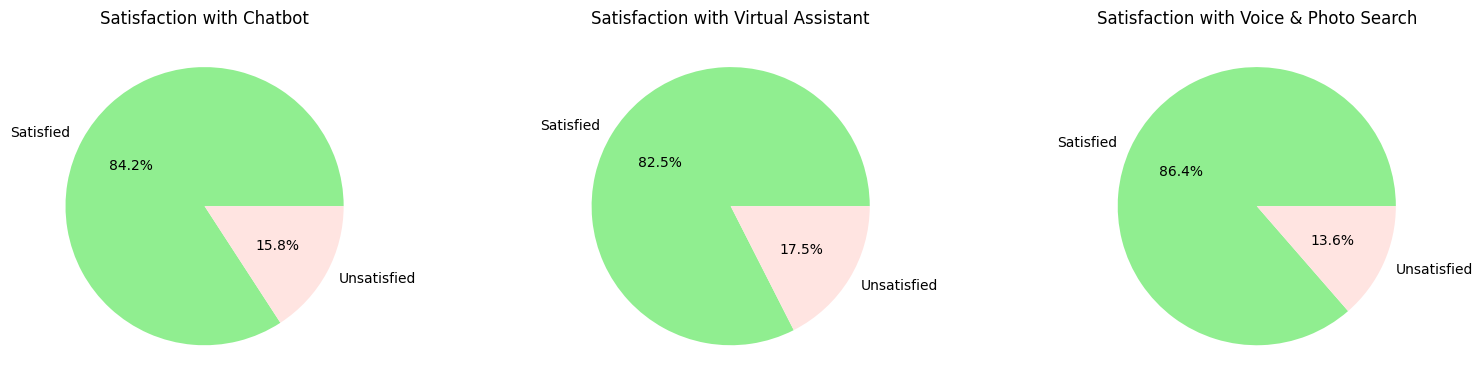

In [118]:
AI_tool_categories = ['AI_Tools_Used _Chatbots','AI_Tools_Used_Virtual_Assistant','AI_Tools_Used_Voice&Photo_Search']
AI_tool_categories_proper = ["Chatbot", "Virtual Assistant", "Voice & Photo Search"]

fig, axes = plt.subplots(nrows=1, ncols=len(AI_tool_categories), figsize=(16,4))

for index, tool in enumerate(AI_tool_categories):
    df_AI_tool = df[df[tool] == "YES"][[tool, 'AI_Satisfication']]
    # now get counts of yes and no's
    df_AI_tool = df_AI_tool.groupby(['AI_Satisfication']).size().fillna(0).astype(int)

    # now plot pie plots
    df_AI_tool.plot(kind="pie", autopct="%1.1f%%", ax=axes[index], colors=["lightgreen", "mistyrose"],subplots=True)
    axes[index].set_title(f"Satisfaction with {AI_tool_categories_proper[index]}")

plt.tight_layout()
plt.show()
# now go through each category and plot the diahg
#filter the dataset by customer products

## Check if users had an enhanced experience vs AI tools

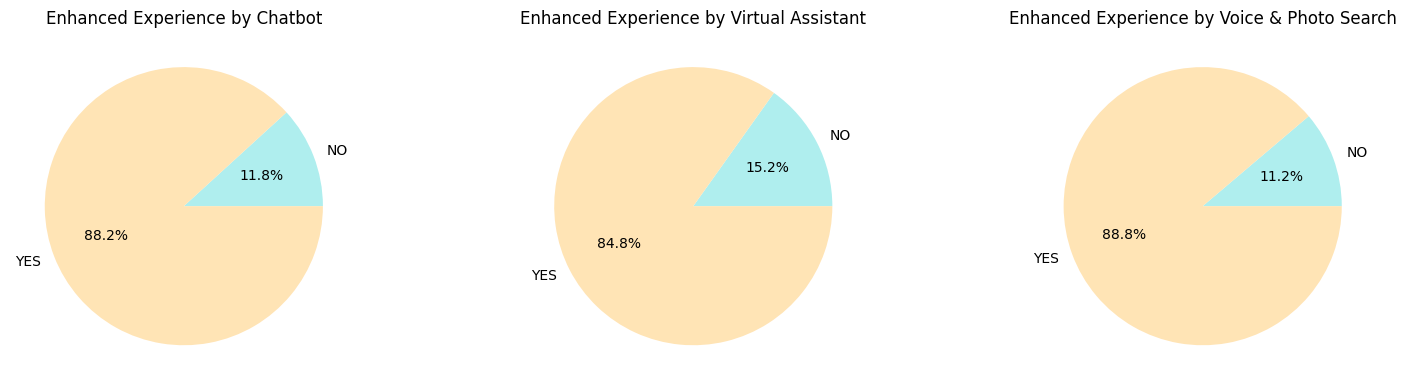

In [119]:
# check if the users think each of the tools enhance the shopping experience
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

for index, tool in enumerate(AI_tool_categories):
    df_AI_tool = df[df[tool] == "YES"][[tool, 'AI_Enhance_Experience']]
    # now get counts of yes and no's
    df_AI_tool = df_AI_tool.groupby(['AI_Enhance_Experience']).size().fillna(0).astype(int)

    # now plot pie plots
    df_AI_tool.plot(kind="pie", autopct="%1.1f%%", ax=axes[index], colors=["paleturquoise", "moccasin"],subplots=True)
    axes[index].set_title(f"Enhanced Experience by {AI_tool_categories_proper[index]}")

plt.tight_layout()
plt.show()

## Check AI satisfaction by product shopping preference (for online shoppers only)

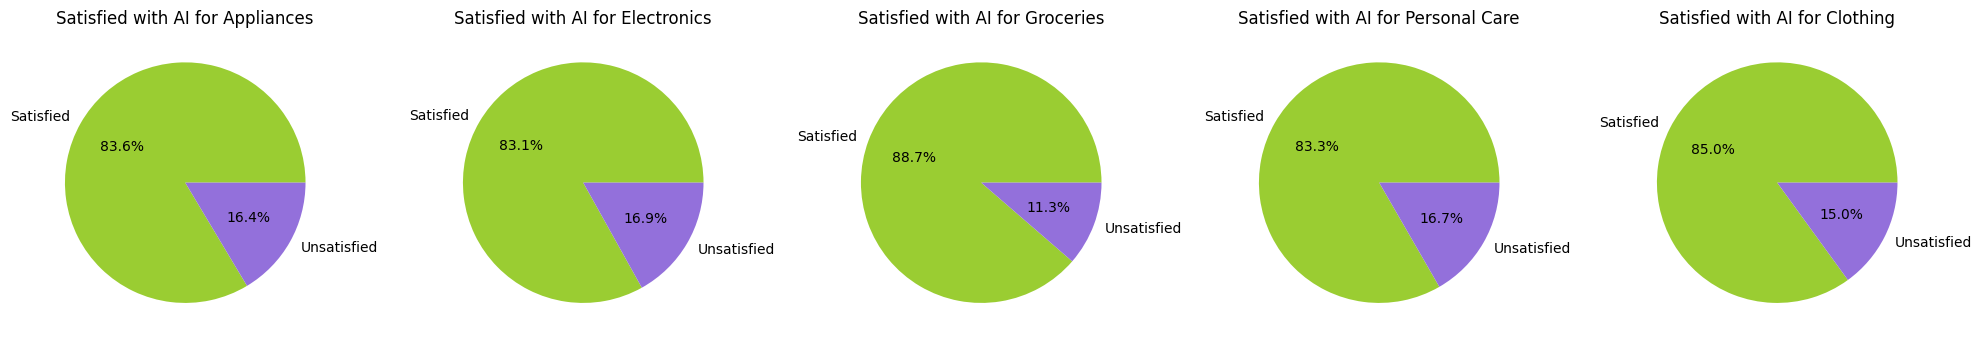

In [120]:
AI_shopping_categories = ['Product_Category_Appliances','Product_Category_Electronics','Product_Category_Groceries', 'Product_Category_Personal_Care', 'Product_Category_Clothing']
AI_shopping_categories_proper = ["Appliances", "Electronics", "Groceries", 'Personal Care', 'Clothing']

# filter the dataset by online shoppers only
df_online_shoppers = df[df["Online_Consumer"] == "YES"]

fig, axes = plt.subplots(nrows=1, ncols=len(AI_shopping_categories), figsize=(20,4))

for index, shop_cat in enumerate(AI_shopping_categories):
    df_AI_shop_cat = df[df[shop_cat] == "YES"][[shop_cat, 'AI_Satisfication']]
    # now get counts of yes and no's
    df_AI_shop_cat = df_AI_shop_cat.groupby(['AI_Satisfication']).size().fillna(0).astype(int)

    # now plot pie plots
    df_AI_shop_cat.plot(kind="pie", autopct="%1.1f%%", ax=axes[index], colors=["yellowgreen", "mediumpurple"],subplots=True)
    axes[index].set_title(f"Satisfied with AI for {AI_shopping_categories_proper[index]}")
plt.tight_layout()
plt.show()

## Time to probe a bit into those that are not online shopper and / or do not prefer online shopping (to be continued)